In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pathlib

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

In [3]:
df = pd.read_csv('/thinkful/data_files/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

/Users/ghenton/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



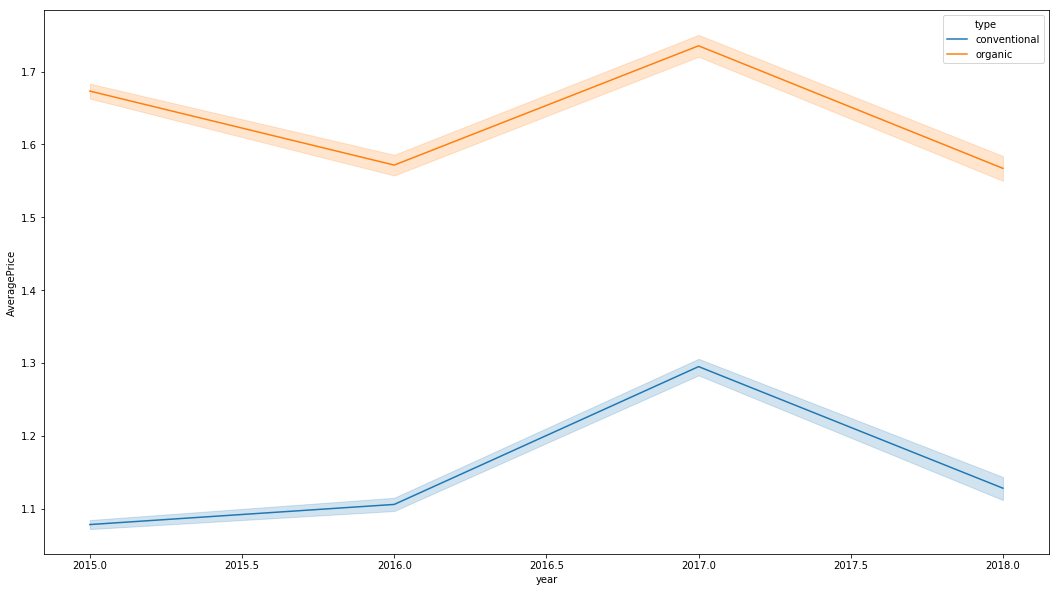

In [5]:
plt.figure(figsize=(18,10))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

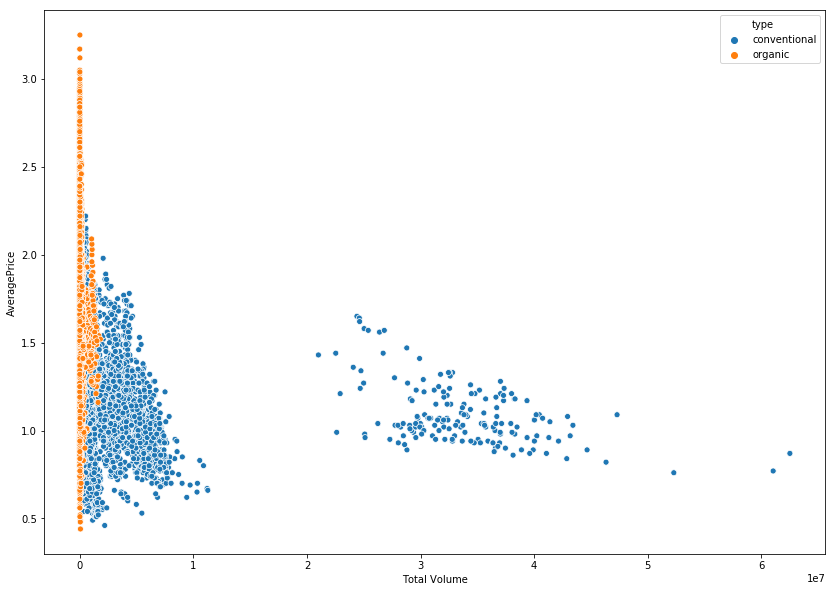

In [6]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= df)

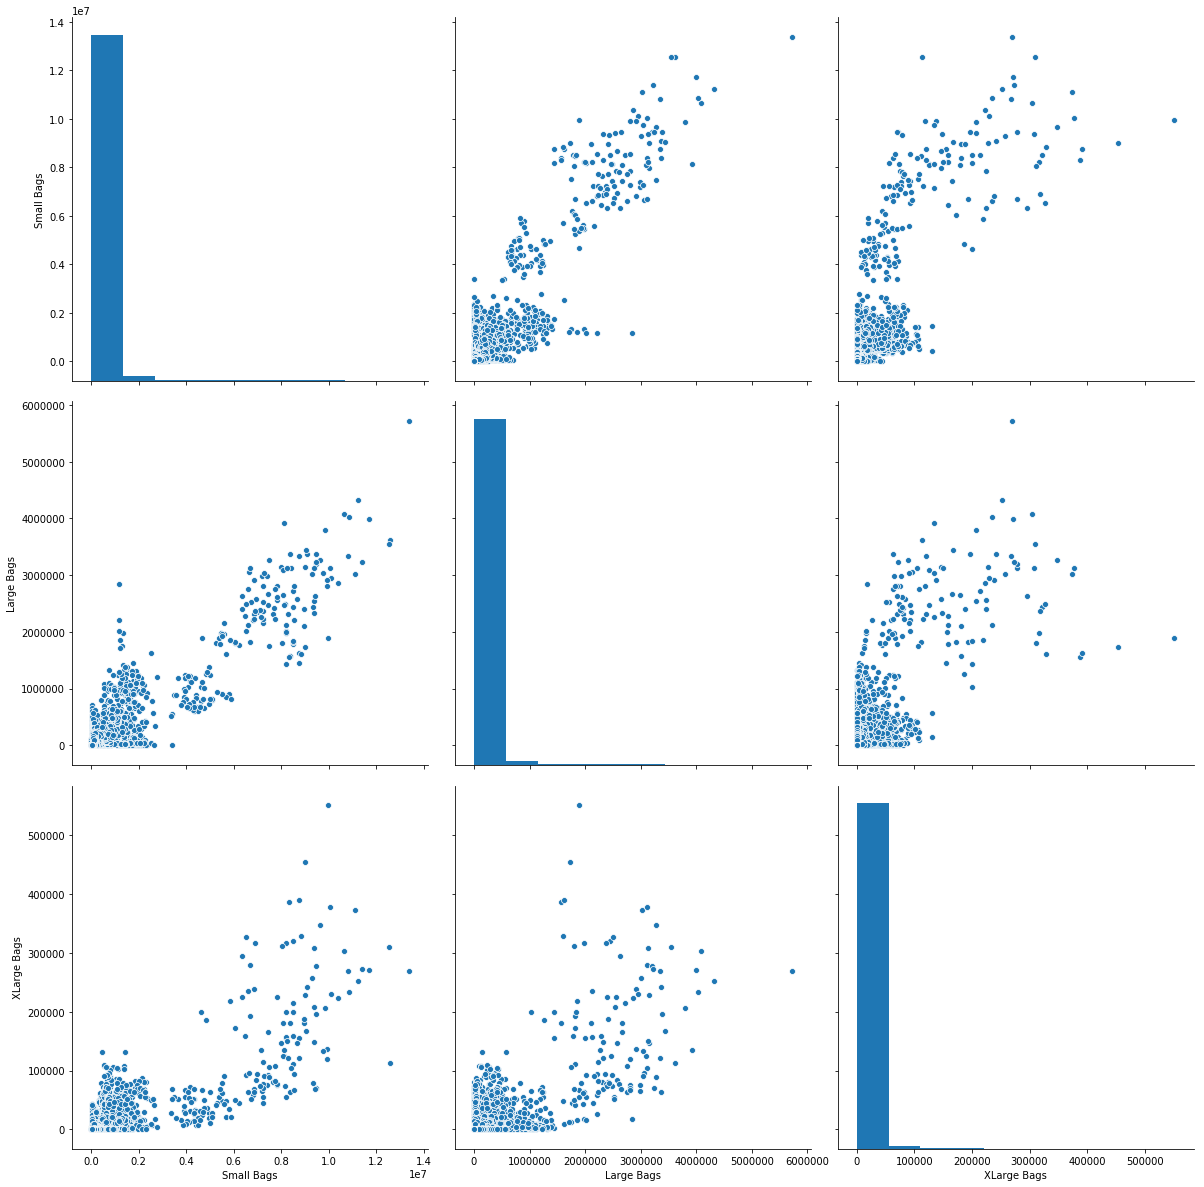

In [7]:
sns.pairplot(df.iloc[:,8:11], palette="husl",height=5.5)


In [8]:
con=df[df['type']=='conventional'].groupby('year')['Total Volume'].agg('mean')
org=df[df['type']=='organic'].groupby('year')['Total Volume'].agg('mean')

trace1=go.Bar(x=con.index,y=con,name="Conventional",
             marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

trace2=go.Bar(x=con.index,y=org,name="Organic",
             marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

data=[trace1,trace2]

layout=go.Layout(barmode="stack",title="Organic vs. Conventional (Mean Volume)",
                yaxis=dict(title="Volume"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)